In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [2]:
congressional_data = pd.read_table('house-votes-84.data.txt',sep=",",header=None)

In [3]:
congressional_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
congressional_data.columns = ["Party", "Handicapped Infants Vote", "Water Project Cost Sharing Vote","Budget Resolution Adoption Vote",
                              "Physician Fee Freeze Vote","El Salvador Aid Vote","Religious Groups in Schools Vote",
                              "Anti Satellite Test Ban Vote", "Aid to Nicaraguan Contras Vote","MX Missile Vote",
                              "Immigration Vote","Synfuels Corporation Cutback Vote","Education Spending Vote",
                              "Superfund Right to Sue Vote","Crime Vote","Duty Free Exports Vote",
                              "Export Administration Act South Africa Vote"]

In [5]:
congressional_data.head()

,Party,Handicapped Infants Vote,Water Project Cost Sharing Vote,Budget Resolution Adoption Vote,Physician Fee Freeze Vote,El Salvador Aid Vote,Religious Groups in Schools Vote,Anti Satellite Test Ban Vote,Aid to Nicaraguan Contras Vote,MX Missile Vote,Immigration Vote,Synfuels Corporation Cutback Vote,Education Spending Vote,Superfund Right to Sue Vote,Crime Vote,Duty Free Exports Vote,Export Administration Act South Africa Vote
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
congressional_data = congressional_data.replace({"y":1,"n":0,"?":np.nan})

In [7]:
congressional_data.head()

,Party,Handicapped Infants Vote,Water Project Cost Sharing Vote,Budget Resolution Adoption Vote,Physician Fee Freeze Vote,El Salvador Aid Vote,Religious Groups in Schools Vote,Anti Satellite Test Ban Vote,Aid to Nicaraguan Contras Vote,MX Missile Vote,Immigration Vote,Synfuels Corporation Cutback Vote,Education Spending Vote,Superfund Right to Sue Vote,Crime Vote,Duty Free Exports Vote,Export Administration Act South Africa Vote
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [131]:
congressional_data = congressional_data.fillna(congressional_data.mean())
congressional_data.head()

AttributeError: 'NoneType' object has no attribute 'head'

**Challenge 2**

Split the data into a test and training set

In [11]:
X = congressional_data[["Handicapped Infants Vote","Water Project Cost Sharing Vote","Budget Resolution Adoption Vote","Physician Fee Freeze Vote","El Salvador Aid Vote","Religious Groups in Schools Vote","Anti Satellite Test Ban Vote","Aid to Nicaraguan Contras Vote","MX Missile Vote","Immigration Vote","Synfuels Corporation Cutback Vote","Education Spending Vote","Superfund Right to Sue Vote","Crime Vote","Duty Free Exports Vote","Export Administration Act South Africa Vote"]]
y = congressional_data["Party"]

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier  
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score  
Which k value gives the highest accuracy?

In [13]:
print(X_train.shape)
print(X_test.shape)

(304, 16)
(131, 16)


In [14]:
print(y_train.shape)
print(y_test.shape)

(304,)
(131,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy_scores_knn = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_scores_knn.append(round(accuracy_score(y_test, y_pred_knn),3))
print(accuracy_scores_knn)

[0.901, 0.893, 0.901, 0.901, 0.916, 0.931, 0.916, 0.924, 0.931, 0.931, 0.924, 0.924, 0.924, 0.924, 0.924, 0.924, 0.924, 0.916, 0.916, 0.916]


**Challenge 4**

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.

In [29]:
from sklearn.linear_model import LogisticRegression

#c parameter controls amount of regularization
lm = LogisticRegression(C=1000)
lm.fit(X_train,y_train)
y_pred_lm = lm.predict(X_test)
logistic_score = round(accuracy_score(y_test, y_pred_lm),3)
print(logistic_score)

0.931


**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

<BarContainer object of 2 artists>

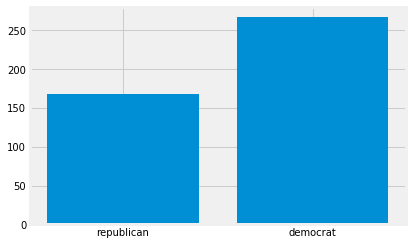

In [33]:
republican_count = len(congressional_data[congressional_data["Party"] == 'republican'])
democrat_count = len(congressional_data[congressional_data["Party"] == 'democrat'])
plt.bar(["republican",'democrat'],[republican_count,democrat_count])

In [34]:
def all_democrat(dataframe):
    return np.asarray(["democrat"] * len(dataframe))

def all_republican(dataframe):
    return np.asarray(["republican"] * len(dataframe))

In [35]:
y_pred_dem = all_democrat(X_test)
dem_score = round(accuracy_score(y_test, y_pred_dem),3)
print(dem_score)

0.588


In [37]:
y_pred_rep = all_republican(X_test)
rep_score = round(accuracy_score(y_test,y_pred_rep),3)
print(rep_score)

0.412


**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

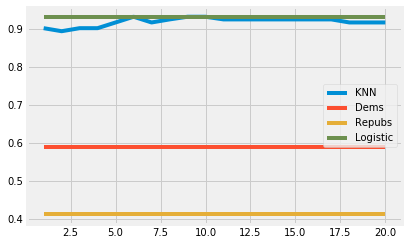

In [44]:
plt.plot(k_range, accuracy_scores_knn, label='KNN')
plt.plot(k_range, [logistic_score] * len(k_range), label='Logistic')
plt.plot(k_range, [dem_score] * len(k_range), label='Democrat')
plt.plot(k_range, [rep_score] * len(k_range), label='Repubublican')
plt.legend();

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

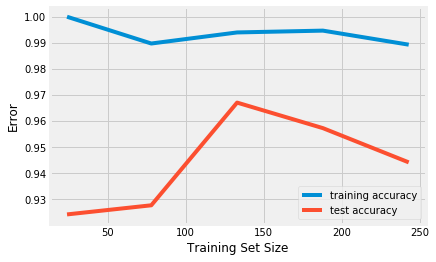

In [51]:
from sklearn.learning_curve import learning_curve
m, train_err, ts_err = learning_curve(lm,X_train,y_train,cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
plt.plot(m, train_cv_err,label="training accuracy")
plt.plot(m, test_cv_err,label="test accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend();

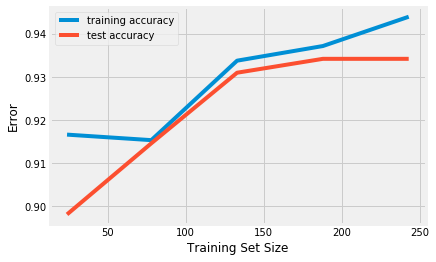

In [59]:
knn = KNeighborsClassifier(n_neighbors=10)
m, train_err, ts_err = learning_curve(knn,X_train,y_train,cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
plt.plot(m, train_cv_err,label="training accuracy")
plt.plot(m, test_cv_err,label="test accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend();

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(accuracy_score(y_test, y_pred_gnb),3)
print(gnb_score)

0.939


In [73]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
svc_score = round(accuracy_score(y_test, y_pred_svc),3)
print(svc_score)

0.954


In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_score = round(accuracy_score(y_test, y_pred_dtc),3)
print(dtc_score)

0.947


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_score = round(accuracy_score(y_test, y_pred_rf),3)
print(rf_score)

0.954


**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [84]:
from sklearn.cross_validation import cross_val_score

#knn
scores_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores_knn.mean())

0.9329029497634149


In [85]:
#logistic
scores_logistic = cross_val_score(lm, X, y, cv=10, scoring='accuracy')
print(scores_logistic.mean())

0.9560656397865699


In [86]:
#naive bayes
scores_nb = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print(scores_nb.mean())

0.9397739857042182


In [87]:
#svc
scores_svc = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores_svc.mean())

0.9582804792107119


In [88]:
#decision tree 
scores_dtc = cross_val_score(dtc, X, y, cv=10, scoring='accuracy')
print(scores_dtc.mean())

0.9374534380348335


In [89]:
#random forest
scores_rf = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(scores_rf.mean())

0.9560102688009666


**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [149]:
congressional_data_2 = pd.read_table('house-votes-84.data.txt',sep=",",header=None)

In [150]:
congressional_data_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [151]:
congressional_data_2 = congressional_data_2.replace({'y':1,'n':0,'?':np.nan})

In [152]:
congressional_data_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [153]:
congressional_data_2 = congressional_data_2[congressional_data_2[1].notna()]

In [154]:
congressional_data_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [156]:
congressional_data_2 = congressional_data_2.fillna(congressional_data_2.mean())

In [157]:
congressional_data_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.358722,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.813456
3,democrat,0.0,1.0,1.0,0.0,0.513382,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.0,1.0,1.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.424242,1.0,1.0,1.0,1.000000
5,democrat,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,1.000000


In [159]:
from sklearn.cross_validation import train_test_split
X = congressional_data_2.loc[:,2:]
y = congressional_data_2.loc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [173]:
knn2 = KNeighborsClassifier(n_neighbors=10)
scores_knn2 = cross_val_score(knn2, X, y, cv=10, scoring='accuracy')
print(scores_knn2.mean())

0.6880533722280744


In [174]:
lm2 = LogisticRegression()
scores_logistic2 = cross_val_score(lm2, X, y, cv=10, scoring='accuracy')
print(scores_logistic2.mean())

0.6972395537908866


**Challenge 11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [175]:
movies_df = pd.read_csv('/Users/ariannabreslauer/Documents/dataScience/metis/bootcamp/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [176]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [177]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [180]:
movies_df = movies_df.dropna()

In [182]:
movies_df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.700000e+01,8.700000e+01,87.000000
mean,7.545402e+07,1.035153e+08,112.551724
std,5.969168e+07,8.797319e+07,17.854554
min,2.500000e+06,2.556825e+07,80.000000
25%,2.900000e+07,4.793810e+07,98.000000
50%,5.500000e+07,7.162818e+07,113.000000
75%,1.125000e+08,1.238093e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


In [183]:
X = movies_df[['Budget','DomesticTotalGross','Runtime']]
y = movies_df['Rating']

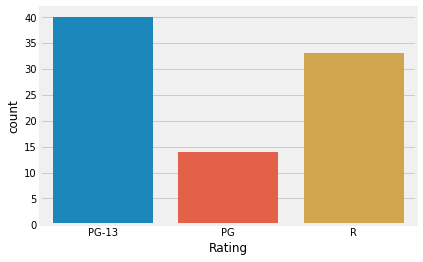

In [188]:
import seaborn as sns
sns.countplot(y);

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=4444)

knn_list = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_list.append((i,cross_val_score(knn, X, y).mean()))
knn_list

[(1, 0.426464148877942),
 (2, 0.3804597701149426),
 (3, 0.39157088122605366),
 (4, 0.414176245210728),
 (5, 0.36814449917898195),
 (6, 0.42525998905309254),
 (7, 0.379255610290093),
 (8, 0.4022441160372195),
 (9, 0.4018609742747674),
 (10, 0.41335522714833056),
 (11, 0.41335522714833056),
 (12, 0.44745484400656815),
 (13, 0.4363437328954571),
 (14, 0.4363437328954571),
 (15, 0.4248494800218938),
 (16, 0.4363437328954571),
 (17, 0.4367542419266557),
 (18, 0.4367542419266557),
 (19, 0.4367542419266557),
 (20, 0.4248494800218938)]

In [201]:
ln = LogisticRegression(C=100000)
ln.fit(X_train,y_train)
accuracy_score(y_test, ln.predict(X_test))

0.4444444444444444

In [203]:
y_pred_pg_13 = ["PG-13"] * len(y_test)
print(round(accuracy_score(y_test, y_pred_pg_13),3))

#stupid predictor only does slighly worse than KNN and logistic

0.407


In [204]:
ln.coef_

array([[-1.46124379e-08, -1.93897623e-09, -1.75965536e-13],
       [ 1.49848414e-08, -6.42667083e-09, -9.13751595e-14],
       [-2.30763200e-08,  5.12598612e-09,  1.16458130e-13]])

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 * What is the earliest year of surgery in this dataset?
 * What is the most recent year of surgery?
 * Use logistic regression to predict survival after 5 years. How well does your model do?
 * What are the coefficients of logistic regression? Which features affect the outcome how?
 * Draw the learning curve for logistic regression in this case.

In [208]:
breast_cancer_data_df = pd.read_csv("/Users/ariannabreslauer/Documents/dataScience/metis/bootcamp/nyc18_ds17/challenges/challenges_data/haberman.data",header=None)
breast_cancer_data_df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [210]:
breast_cancer_data_df[0].mean()

52.45751633986928

In [211]:
breast_cancer_data_df[0].std()

10.80345234930328

In [212]:
breast_cancer_data_df = breast_cancer_data_df.rename({0:'age',1:'surgery_year',2:'nodes',3:'survival_status'},axis=1)

In [213]:
breast_cancer_data_df.head(1)

,age,surgery_year,nodes,survival_status
0,30,64,1,1


In [214]:
print(breast_cancer_data_df["age"][breast_cancer_data_df["survival_status"] == 1].mean())
print(breast_cancer_data_df["age"][breast_cancer_data_df["survival_status"] == 1].std())

52.01777777777778
11.012154179929546


In [215]:
print(breast_cancer_data_df["age"][breast_cancer_data_df["survival_status"] == 2].mean())
print(breast_cancer_data_df["age"][breast_cancer_data_df["survival_status"] == 2].std())

53.67901234567901
10.16713720829741


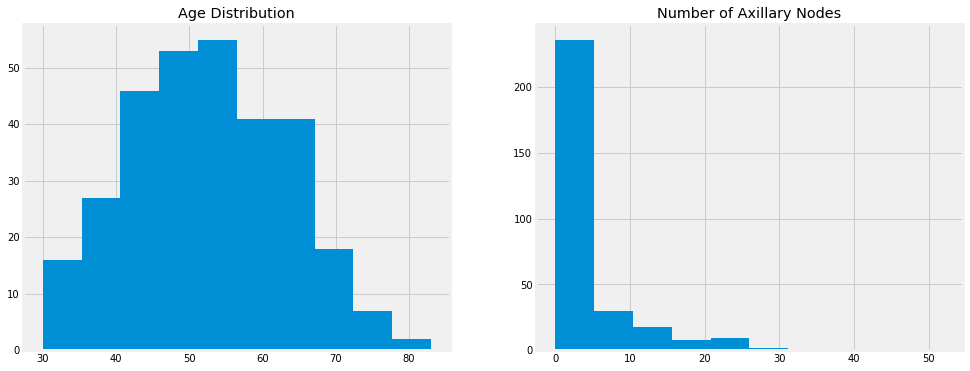

In [220]:
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
plt.title('Age Distribution')
plt.hist(breast_cancer_data_df["age"])

plt.subplot(1,2,2)
plt.title('Number of Axillary Nodes')
plt.hist(breast_cancer_data_df["nodes"]);

In [226]:
print("19" + str(breast_cancer_data_df["surgery_year"].min()))

1958


In [225]:
print("19" + str(breast_cancer_data_df["surgery_year"].max()))

1969


In [227]:
X = breast_cancer_data_df[["age","nodes","surgery_year"]]
y = breast_cancer_data_df["survival_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

lm = LogisticRegression(C=1000)
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
accuracy_score(y_test,y_pred)

0.8369565217391305

In [228]:
lm.coef_

array([[0.01745118, 0.07194997, 0.00598171]])

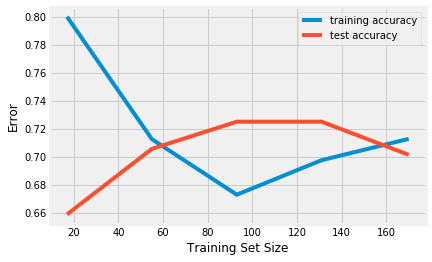

In [229]:
m, train_err, ts_err = learning_curve(lm,X_train,y_train,cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
plt.plot(m, train_cv_err,label="training accuracy")
plt.plot(m, test_cv_err,label="test accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend();